Code Credits : https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html

In [0]:
!pip install -U -q PyDrive


In [0]:
from google.colab import auth
auth.authenticate_user()

In [0]:
from googleapiclient.discovery import build
drive_service = build('drive', 'v3')

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

def getFile(file_name, target_id):

  # 1. Authenticate and create the PyDrive client.
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)

  #2. Get the file
  downloaded = drive.CreateFile({'id':target_id}) # replace the id with id of file you want to access
  downloaded.GetContentFile(file_name)  
  print 'done downloading '+ file_name

In [0]:
model_file = ['my_model-VGGplain.h5','my_model-noisefree.h5', 'my_model-face.h5']
model_file_key = ['1tQGYe4gkbMCnrGOTCUNtbbwreMllDpaz','1eptLBIJyNEWOpmYBebTZMX8iNR07HMLB', '12jURbTR0mHTRSj7T-Hzgg7eSwyvBp-9H']

In [8]:
for i in range(0, len(model_file)):
  getFile(model_file[i], model_file_key[i])

done downloading my_model-VGGplain.h5
done downloading my_model-noisefree.h5
done downloading my_model-face.h5


In [9]:
from keras.models import load_model

model1 = load_model(model_file[0])
model2 = load_model(model_file[1])
model3 = load_model(model_file[2])



Using TensorFlow backend.


In [0]:
import PIL.Image
import matplotlib.pyplot as plt
from cStringIO import StringIO
import IPython.display
from tempfile import TemporaryFile
def showarray(a, fmt='png'):
    a = np.uint8(a)
    f = StringIO()
    PIL.Image.fromarray(a).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))

In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
import cv2
input_img_data = cv2.imread('shailendra.jpg')
input_img_data = cv2.resize(input_img_data, (224, 224))

In [0]:
from keras import applications

# build the VGG16 network
# model = applications.VGG16(include_top=True,
#                            weights='imagenet')

# get the symbolic outputs of each "key" layer (we gave them unique names).

model = model3
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
from keras import backend as K

layer_name = 'block5_conv1'
filter_index = 0  # can be any integer from 0 to 511, as there are 512 filters in that layer

# build a loss function that maximizes the activation
# of the nth filter of the layer considered
layer_output = layer_dict[layer_name].output
# loss = K.mean(layer_output[:, :, :, filter_index])
output_index = 3
loss = K.mean(model.output[:, output_index])

input_img = model.input
# compute the gradient of the input picture wrt this loss
grads = K.gradients(loss, input_img)[0]

# normalization trick: we normalize the gradient
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

# this function returns the loss and grads given the input picture
iterate = K.function([input_img], [loss, grads])

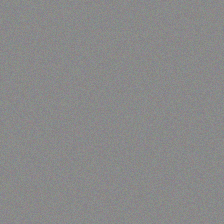

4.3214597e-05
6.683939e-05
0.00010725456
0.0001909538
0.00033786413
0.0004573468
0.0010866938
0.0017742201
0.0038036928
0.0059240595
0.014089824
0.029973023
0.052490674
0.07337179
0.17147179
0.2142107
0.42116472
0.75464535
0.8336765
0.98523664
0.99798155
0.9988009
0.9990615
0.9992207
0.999328
0.99940443
0.99946445
0.99951196
0.9995497
0.99958175
0.9996093
0.9996327
0.9996536
0.9996722
0.99968827


In [66]:
import numpy as np



input_img_data2 = np.random.random((1, 224, 224, 3)) * 20 + 128

# input_img_data2 = np.array([input_img_data], dtype=np.float32)
showarray(input_img_data2[0,:,:,:])
input_img_data2 = input_img_data2/255.0


# showarray(input_img_data2[0,:,:,:])

# run gradient ascent for 20 steps
step = 1
for i in range(35):
    loss_value, grads_value = iterate([input_img_data2])
    input_img_data2 += grads_value * step
    print loss_value

(224, 224, 3)


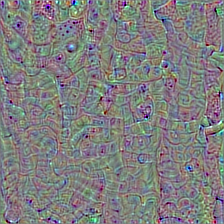

In [67]:
from scipy.misc import imsave

# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
#     x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

img = input_img_data2[0,:,:,:]
img = deprocess_image(img)

# tmp = img[:,:,0]
# img[:,:,0] = img[:,:,2]
# img[:,:,2] = tmp
print img.shape
# img = img.reshape((128,128,3))
# imsave('%s_filter_%d.png' % (layer_name, filter_index), img)
showarray(img)

In [68]:
print model.predict(np.array(input_img_data2))

[[2.1044408e-04 2.7833774e-04 2.9676729e-01 5.7120185e-04 1.9889843e-05
  3.1171318e-02 6.7098153e-01]]
